# Import necessary liabraries

In [ ]:
  import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
warnings.filterwarnings("ignore")

# load the data

In [ ]:
Telcom_data = pd.read_excel("/content/featured_telcom_data.xlsx")

In [ ]:

Telcom_data.head()# to show the head of the data

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Email DL (Bytes) Total,Email UL (Bytes) Total,Youtube DL (Bytes) Total,Youtube UL (Bytes) Total,Netflix DL (Bytes) Total,Netflix UL (Bytes) Total,Gaming DL (Bytes) Total,Gaming UL (Bytes) Total,Other DL (Bytes) Total,Other UL (Bytes) Total
0,13114483460844900352,2019-04-04 12:01:18,770,2019-04-25 14:35:31,662,1823652,208201448079117,33664962239,35521209507511,9164566995485190,...,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0
1,13114483482878900224,2019-04-09 13:04:04,235,2019-04-25 08:15:48,606,1365104,208201909211140,33681854413,35794009006359,L77566A,...,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0
2,13114483484080500736,2019-04-09 17:42:11,1,2019-04-25 11:58:13,652,1361762,208200314458056,33760627129,35281510359387,D42335A,...,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0
3,13114483485442799616,2019-04-10 00:31:25,486,2019-04-25 07:36:35,171,1321509,208201402342131,33750343200,35356610164913,T21824A,...,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0
4,13114483499480700928,2019-04-12 20:10:23,565,2019-04-25 10:40:32,954,1089009,208201401415120,33699795932,35407009745539,D88865A,...,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0


In [ ]:
Telcom_data.shape# show the shape of the data

(150001, 70)

#Calculate average TCP retransmission, RTT, and throughput

In [ ]:
Telcom_data['Avg TCP Retrans. Vol (Bytes)'] = (Telcom_data['TCP DL Retrans. Vol (Bytes)'] +
                                      Telcom_data['TCP UL Retrans. Vol (Bytes)']) / 2

In [ ]:
Telcom_data['Avg TCP Retrans. Vol (Bytes)']

,Avg TCP Retrans. Vol (Bytes)
0,294839.75
1,294839.75
2,294839.75
3,294839.75
4,294839.75
...,...
149996,294839.75
149997,294839.75
149998,294839.75
149999,294839.75


In [ ]:
Telcom_data['Avg RTT (ms)'] = (Telcom_data['Avg RTT DL (ms)'] + Telcom_data['Avg RTT UL (ms)']) / 2

In [ ]:
Telcom_data['Avg RTT (ms)']# find the average of DL+UL of RTT

,Avg RTT (ms)
0,23.5
1,35.0
2,25.0
3,25.0
4,25.0
...,...
149996,16.0
149997,14.5
149998,24.5
149999,21.0


In [ ]:
Telcom_data['Avg Throughput (kbps)'] = (Telcom_data['Avg Bearer TP DL (kbps)'] + Telcom_data['Avg Bearer TP UL (kbps)']) / 2

In [ ]:
Telcom_data['Avg Throughput (kbps)']# find the average of DL+UL of Throughput

,Avg Throughput (kbps)
0,33.5
1,21.0
2,7.5
3,44.0
4,7.5
...,...
149996,58.5
149997,38.5
149998,45.0
149999,35.5


# Select relevant features for clustering

In [ ]:
features = Telcom_data[['Avg TCP Retrans. Vol (Bytes)', 'Avg RTT (ms)', 'Avg Throughput (kbps)']]

In [ ]:
# Standardize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

#Perform k-means clustering for engagement


In [ ]:
kmeans_engagement = KMeans(n_clusters=3, random_state=42)
engagement_clusters = kmeans_engagement.fit_predict(features_scaled)
Telcom_data['Engagement Cluster'] = engagement_clusters

#Perform k-means clustering for experience

In [ ]:
kmeans_experience = KMeans(n_clusters=3, random_state=42)
experience_clusters = kmeans_experience.fit_predict(features_scaled)
Telcom_data['Experience Cluster'] = experience_clusters

# Calculate the Euclidean distance for engagement score

In [ ]:
less_engaged_centroid = kmeans_engagement.cluster_centers_[0]
Telcom_data['Engagement Score'] = cdist(features_scaled, [less_engaged_centroid], metric='euclidean')

In [ ]:
Telcom_data['Engagement Score']

,Engagement Score
0,0.196168
1,0.175220
2,0.194544
3,0.192352
4,0.194544
...,...
149996,0.212012
149997,0.216762
149998,0.193348
149999,0.201561


# Calculate the Euclidean distance for experience score

In [ ]:
worst_experience_centroid = kmeans_experience.cluster_centers_[2]
Telcom_data['Experience Score'] = cdist(features_scaled, [worst_experience_centroid], metric='euclidean')

In [ ]:
Telcom_data['Experience Score']

,Experience Score
0,22.346687
1,22.346503
2,22.346875
3,22.346551
4,22.346875
...,...
149996,22.346697
149997,22.346925
149998,22.346556
149999,22.346743


# Calculate the satisfaction score as the average of engagement and experience scores

In [ ]:
Telcom_data['Satisfaction Score'] = (Telcom_data['Engagement Score'] + Telcom_data['Experience Score']) / 2

In [ ]:
Telcom_data['Satisfaction Score']

,Satisfaction Score
0,11.271427
1,11.260862
2,11.270709
3,11.269452
4,11.270709
...,...
149996,11.279355
149997,11.281843
149998,11.269952
149999,11.274152


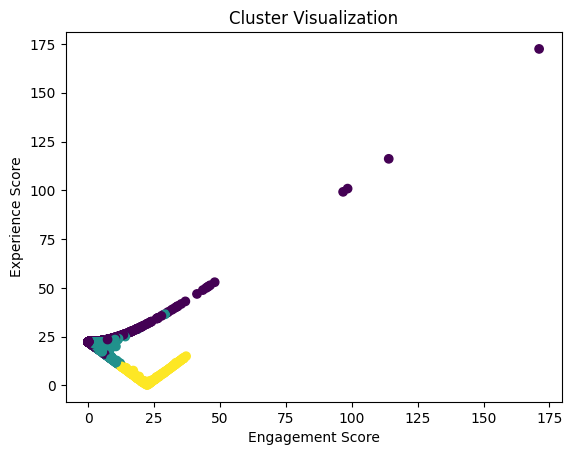

In [ ]:
# Visualization of clusters
plt.scatter(Telcom_data['Engagement Score'],Telcom_data ['Experience Score'], c=Telcom_data['Experience Cluster']) # Changed 'Engagement_Score' to 'Engagement Score'
plt.xlabel('Engagement Score')
plt.ylabel('Experience Score')
plt.title('Cluster Visualization')
plt.show()

# Report the top 10 satisfied customers

In [ ]:
top_10_satisfied_customers = Telcom_data.nsmallest(10, 'Satisfaction Score')

# Print the top 10 satisfied customers

In [ ]:
print(top_10_satisfied_customers[['Engagement Score', 'Experience Score', 'Satisfaction Score']])

        Engagement Score  Experience Score  Satisfaction Score
83562          10.846401         11.472356           11.159379
45691           9.673159         12.645617           11.159388
135980          1.286370         21.032415           11.159392
44369           0.609105         21.709703           11.159404
37953           0.234574         22.084264           11.159419
137253          0.023036         22.295867           11.159452
96042           0.387443         21.931535           11.159489
2810           10.239941         12.079049           11.159495
34529           0.156277         22.162973           11.159625
15839           0.456079         21.863191           11.159635


## Prepare the Data:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Prepare the features and target
X = np.asanyarray(Telcom_data[['Avg TCP Retrans. Vol (Bytes)', 'Avg RTT (ms)', 'Avg Throughput (kbps)']])
y = np.asanyarray(Telcom_data['Satisfaction Score'])

In [ ]:
X.shape  , y.shape

((150001, 3), (150001,))

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initialize and train the RandomForestRegressor model

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
r2_score_ = r2_score(y_test, y_pred)

In [ ]:
r2_score_

0.9066361669597852

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [ ]:
mae  , mse   , rmse

(0.12303205004189413, 0.07216062127840715, 0.2686272906433878)

# Initialize and train the  model

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np # Assuming X is a numpy array. Import pandas if it's a DataFrame

# Sample data for demonstration
X = np.array(Telcom_data[['Avg TCP Retrans. Vol (Bytes)', 'Avg RTT (ms)', 'Avg Throughput (kbps)']])

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scaling features (if necessary)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Importing the necessary function from scikit-learn
from sklearn.model_selection import train_test_split

# Assuming you have your features in X and target variable in y
# Replace these with your actual data
X = np.array(Telcom_data[['Avg TCP Retrans. Vol (Bytes)', 'Avg RTT (ms)', 'Avg Throughput (kbps)']])
y = np.array(Telcom_data['Satisfaction Score']) # Example feature data
 # Example target variable data

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Import the RandomForestRegressor class from sklearn
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 0.001508620386191035
R² Score: 0.998048096325086


In [ ]:
# Using the Model for Prediction
# Select the same features used for training
features_data = features[['Avg TCP Retrans. Vol (Bytes)', 'Avg RTT (ms)', 'Avg Throughput (kbps)']] # Use features DataFrame instead of df2
# Assuming 'Satisfaction Score' and 'MSISDN/Number' are the columns to drop
# Replace these with your actual column names if they are different
features_data = features_data.drop(['Satisfaction Score', 'MSISDN/Number'], axis=1, errors='ignore') # Use features_data and handle potential KeyError

In [ ]:
# Predict satisfaction scores
predicted_scores = model.predict(features_data)

# Add predictions to the new_data DataFrame
features_data['Predicted_Satisfaction_Score'] = predicted_scores

In [ ]:
# Display the DataFrame with the predictions
features_data[['Predicted_Satisfaction_Score']] # Use square brackets to select columns

,Predicted_Satisfaction_Score
0,11.271427
1,11.260865
2,11.270709
3,11.269452
4,11.270709
...,...
149996,11.279355
149997,11.281843
149998,11.269952
149999,11.274153


In [ ]:
import pickle
pickle.dump(model,open('regression_model.pkl','wb'))
print(type(model))

<class 'sklearn.ensemble._forest.RandomForestRegressor'>


# Extract the engagement and experience scores

In [ ]:
scores = Telcom_data[['Engagement Score', 'Experience Score']]

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
Telcom_data['Score Cluster'] = kmeans.fit_predict(scores)

In [ ]:
centroids = kmeans.cluster_centers_

In [ ]:
centroids

array([[ 0.68828002, 22.28129064],
       [22.86825532, 13.58390469]])

# Visualize the clusters

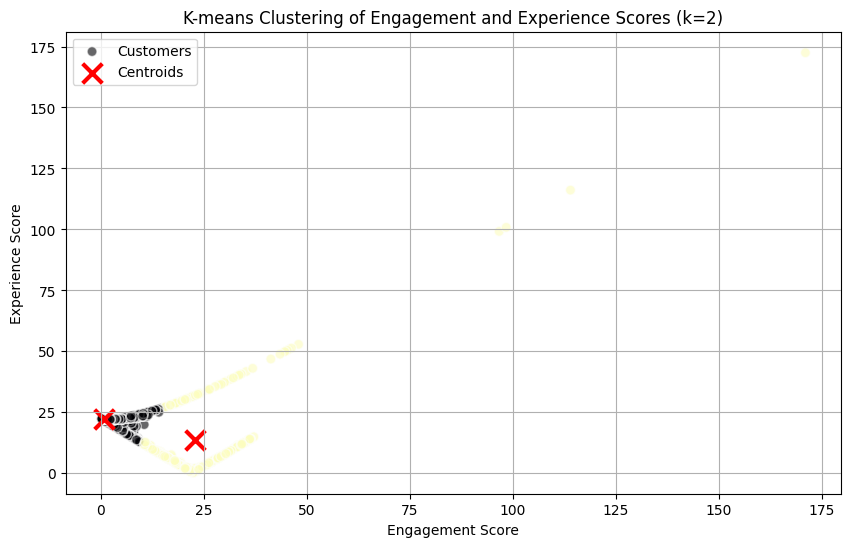

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(Telcom_data['Engagement Score'], Telcom_data['Experience Score'], c=Telcom_data['Score Cluster'], cmap='magma', marker='o', s=50, alpha=0.6, edgecolor='w', label='Customers')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, linewidths=3, label='Centroids')
plt.title('K-means Clustering of Engagement and Experience Scores (k=2)')
plt.xlabel('Engagement Score')
plt.ylabel('Experience Score')
plt.legend()
plt.grid(True)
plt.show()

#

# on X-axis Engagement score of customer how actively and frequently customer uses the services higher score indicating more engagement.
#On Y-axis experience scores quality of the users experience higher the scores suggest better network performance power issues come.


In [ ]:
print(pd.DataFrame(centroids, columns=['Engagement Score', 'Experience Score']))

   Engagement Score  Experience Score
0          0.688280         22.281291
1         22.868255         13.583905


#Aggregate the average satisfaction and experience score per cluster

In [ ]:
Telcom_data['Satisfaction Score'] = (Telcom_data['Engagement Score'] + Telcom_data['Experience Score']) / 2

In [ ]:
cluster_aggregation = Telcom_data.groupby('Score Cluster').agg({
    'Satisfaction Score': 'mean',
    'Experience Score': 'mean'
}).reset_index()

In [ ]:
cluster_aggregation

,Score Cluster,Satisfaction Score,Experience Score
0,0,11.484785,22.281291
1,1,18.226080,13.583905


#

#Cluster 0 appers to be associated with users who are both highly satisfied and have a experience score
# Cluster 1 might be represent users who are satisfied but have a much lower experience score.

In [ ]:
Telcom_data.to_csv("Final_Data.csv",index=False)